## Analysis of Netflix Movies and Series

This is an EDA of the popular video streaming platform, Netflix. This dataset was gotten from Kaggle dataset, consisting of over 8,000+ data points.

##### Importing the neccessary libraries

In [64]:
# import pandas and analytic packages
import os
import pandas as pd
import numpy as np
from dateutil import parser

# viz packages
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

#### File Path and Data Extraction

In [2]:
# use os package to extract data from file

directory = os.getcwd()
file_path = directory + '/netflix_titles.csv'
netflix_data = pd.read_csv(file_path)

In [3]:
# duplicate dataset

netflix_data = netflix_data.fillna(0)
data = netflix_data.copy()

#### Data Pre-processing

In [4]:
# extract month and year of the date videos were added to Netflix

data['dateAdded'] = pd.to_datetime(data['date_added'])
data['monthAdded'] = pd.DatetimeIndex(data['dateAdded']).month
data['yearAdded'] = pd.DatetimeIndex(data['dateAdded']).year
data['monthName'] = data['dateAdded'].apply(lambda x: x.strftime("%B")) 

In [5]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dateAdded,monthAdded,yearAdded,monthName
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,0,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9,2021,September
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,2021,September


#### Analysis of Videos Added to the Netflix platform

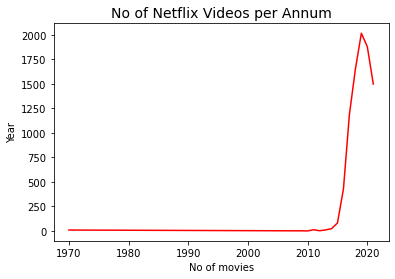

In [8]:
# yearly analysis of videos added  over time

yearData = data.groupby('yearAdded').count()
yearData = pd.DataFrame(yearData.show_id)

plt.plot(yearData.index, yearData.show_id, color='red')
plt.title('No of Netflix Videos per Annum', size=14)
plt.xlabel('No of movies')
plt.ylabel('Year')
plt.show()

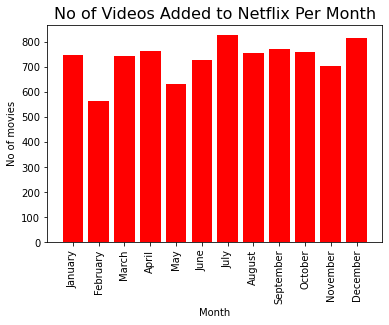

In [9]:
# month-distribution of video added to the platform

monthData = data.groupby('monthName').count()
monthData = pd.DataFrame(monthData.show_id)
months = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthData = monthData.reindex(months)

plt.bar(monthData.index, monthData.show_id, color='red')
plt.title('No of Videos Added to Netflix Per Month', size=16)
plt.ylabel('No of movies')
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.show()

#### Ratings analysis of Netflix videos

In [ ]:
# Overall ratings of both movies and series on the platform

movies_rating = data.groupby('rating').count()
movies_rating = pd.DataFrame(movies_rating.show_id)
movies_rating = movies_rating.iloc[1:]

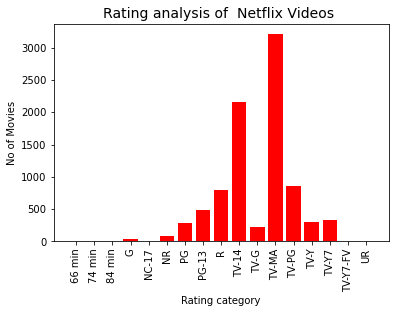

In [ ]:
plt.bar(movies_rating.index, movies_rating.show_id, color='red')
plt.title('Rating analysis of  Netflix Videos ', size=14)
plt.xlabel('Rating category')
plt.ylabel('No of Movies')
plt.xticks(rotation=90)
plt.show()

### Netflix videos breakdown

In [10]:
set(netflix_data.type)

{'Movie', 'TV Show'}

In [11]:
netflix_movies = data[data.type == 'Movie']
netflix_series = data[data.type == 'TV Show']

In [12]:
netflix_type = data.groupby('type').count()
netflix_type = pd.DataFrame(netflix_type.show_id)
netflix_type

,show_id
type,
Movie,6131
TV Show,2676


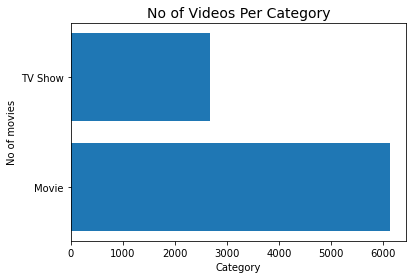

In [13]:
plt.barh(netflix_type.index, netflix_type.show_id)

plt.title('No of Videos Per Category', size=14)
plt.ylabel('No of movies')
plt.xlabel('Category')

plt.show()

#### Number of Videos released by year on the Netflix platform

In [14]:
release_year = data.groupby('release_year').count()
release_year = pd.DataFrame(release_year.show_id)

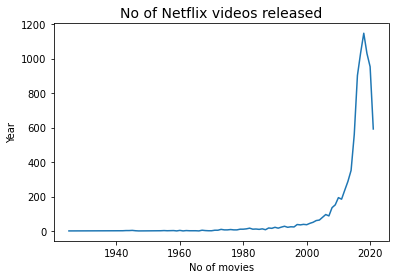

In [15]:
plt.plot(release_year.index, release_year.show_id)
plt.title('No of Netflix videos released', size=14)
plt.xlabel('No of movies')
plt.ylabel('Year')

plt.show()

#### Netflix Movies Analysis

In [16]:
netflix_movies.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dateAdded,monthAdded,yearAdded,monthName
5485,s5486,Movie,Ram Jaane,Rajiv Mehra,"Shah Rukh Khan, Juhi Chawla, Vivek Mushran, Pa...",India,"May 15, 2017",1995,TV-14,142 min,"Dramas, International Movies, Music & Musicals","Two boyhood pals – one righteous, the other a ...",2017-05-15,5,2017,May
2434,s2435,Movie,Let's Dance,Inas El-Degheidy,"Yousra, Tamer Hagras, Ezzat Abou Aouf, Hala Se...",Egypt,"June 2, 2020",2006,TV-14,116 min,"Comedies, Dramas, International Movies","Disillusioned with her humdrum routine, a marr...",2020-06-02,6,2020,June


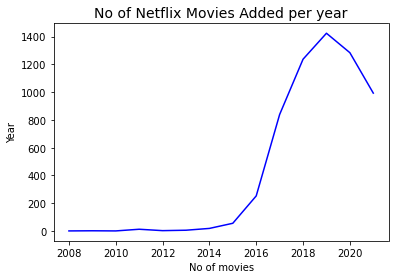

In [17]:
# yearly analysis of Netflix movies added over time

yearData1 = netflix_movies.groupby('yearAdded').count()
yearData1 = pd.DataFrame(yearData1.show_id)

plt.plot(yearData1.index, yearData1.show_id, color='blue')
plt.title('No of Netflix Movies Added per year', size=14)
plt.xlabel('No of movies')
plt.ylabel('Year')
plt.show()

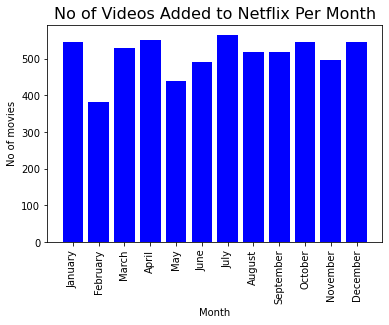

In [18]:
# Monthly distribution of Movies addition

monthData1 = netflix_movies.groupby('monthName').count()
monthData1 = pd.DataFrame(monthData1.show_id)
months = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthData1 = monthData1.reindex(months)

plt.bar(monthData1.index, monthData1.show_id, color='blue')
plt.title('No of Movies Added to Netflix Per Month', size=16)
plt.ylabel('No of movies')
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
new  = netflix_movies["duration"].str.split(" ", n=1, expand=True)
netflix_movies["Dmins"] = new[0]
netflix_movies['Dmins'] = pd.to_numeric(netflix_movies['Dmins'])
netflix_movies = netflix_movies.fillna(0)

In [27]:
netflix_movies = netflix_movies.drop(['minsDuration'], axis=1)

#### Duration analysis of Netflix movies

<AxesSubplot:xlabel='Dmins', ylabel='Count'>

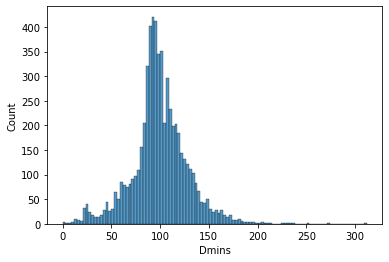

In [51]:
sns.histplot(data=netflix_movies, x='Dmins')

#### Ratings analysis of Netflix movies

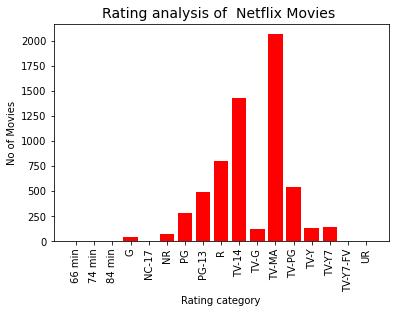

In [61]:
netflixMovies_rating = netflix_movies.groupby('rating').count()
netflixMovies_rating = pd.DataFrame(netflixMovies_rating.show_id)
netflixMovies_rating = netflixMovies_rating.iloc[1:]
plt.bar(netflixMovies_rating.index, netflixMovies_rating.show_id, color='red')
plt.title('Rating analysis of  Netflix Movies ', size=14)
plt.xlabel('Rating category')
plt.ylabel('No of Movies')
plt.xticks(rotation=90)
plt.show()

### Netflix Series Analysis

In [ ]:
netflix_series.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dateAdded,monthAdded,yearAdded,monthName
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,9,2021,September


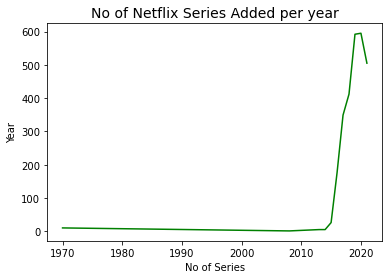

In [ ]:
# yearly additions to the netflix platform

yearData2 = netflix_series.groupby('yearAdded').count()
yearData2 = pd.DataFrame(yearData2.show_id)

plt.plot(yearData2.index, yearData2.show_id, color='g')
plt.title('No of Netflix Series Added per year', size=14)
plt.xlabel('No of Series')
plt.ylabel('Year')
plt.show()

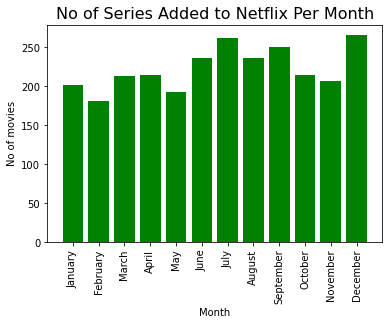

In [ ]:
# monthly addition of series on Netflix

monthData2 = netflix_series.groupby('monthName').count()
monthData2 = pd.DataFrame(monthData2.show_id)
months = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthData2 = monthData2.reindex(months)

plt.bar(monthData2.index, monthData2.show_id, color='g')
plt.title('No of Series Added to Netflix Per Month', size=16)
plt.ylabel('No of movies')
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Seasonsal distribution of NEtflix series

seasonal_movies = netflix_series.groupby('duration').count()
seasonal_movies = pd.DataFrame(seasonal_movies.show_id)
seasonal_movies

,show_id
duration,
1 Season,1793
10 Seasons,7
11 Seasons,2
12 Seasons,2
13 Seasons,3
15 Seasons,2
17 Seasons,1
2 Seasons,425
3 Seasons,199


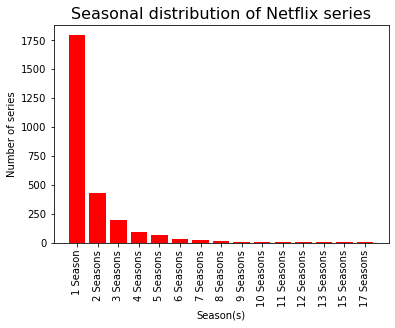

In [ ]:

seasons = [ '1 Season', '2 Seasons', '3 Seasons', '4 Seasons', '5 Seasons', '6 Seasons', '7 Seasons', '8 Seasons', '9 Seasons', '10 Seasons', '11 Seasons', '12 Seasons', '13 Seasons', '15 Seasons', '17 Seasons']
seasonal_movies = seasonal_movies.reindex(seasons)

plt.bar(seasonal_movies.index, seasonal_movies.show_id, color='r')
plt.title('Seasonal distribution of Netflix series', size=16)
plt.ylabel('Number of series')
plt.xlabel('Season(s)')
plt.xticks(rotation = 90)
plt.show()

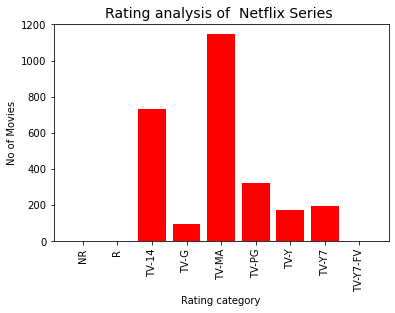

In [63]:
# Ratings analysis of Netflix series

series_rating = netflix_series.groupby('rating').count()
series_rating = pd.DataFrame(series_rating.show_id)
series_rating = series_rating.iloc[1:]
plt.bar(series_rating.index, series_rating.show_id, color='red')
plt.title('Rating analysis of  Netflix Series ', size=14)
plt.xlabel('Rating category')
plt.ylabel('No of Movies')
plt.xticks(rotation=90)
plt.show()

### Word analysis of Video description, Title and Country of production

C:\Users\sadeo\AppData\Local\Temp/ipykernel_11544/3605796767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_series['title_no_stopwords'] = netflix_series['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])


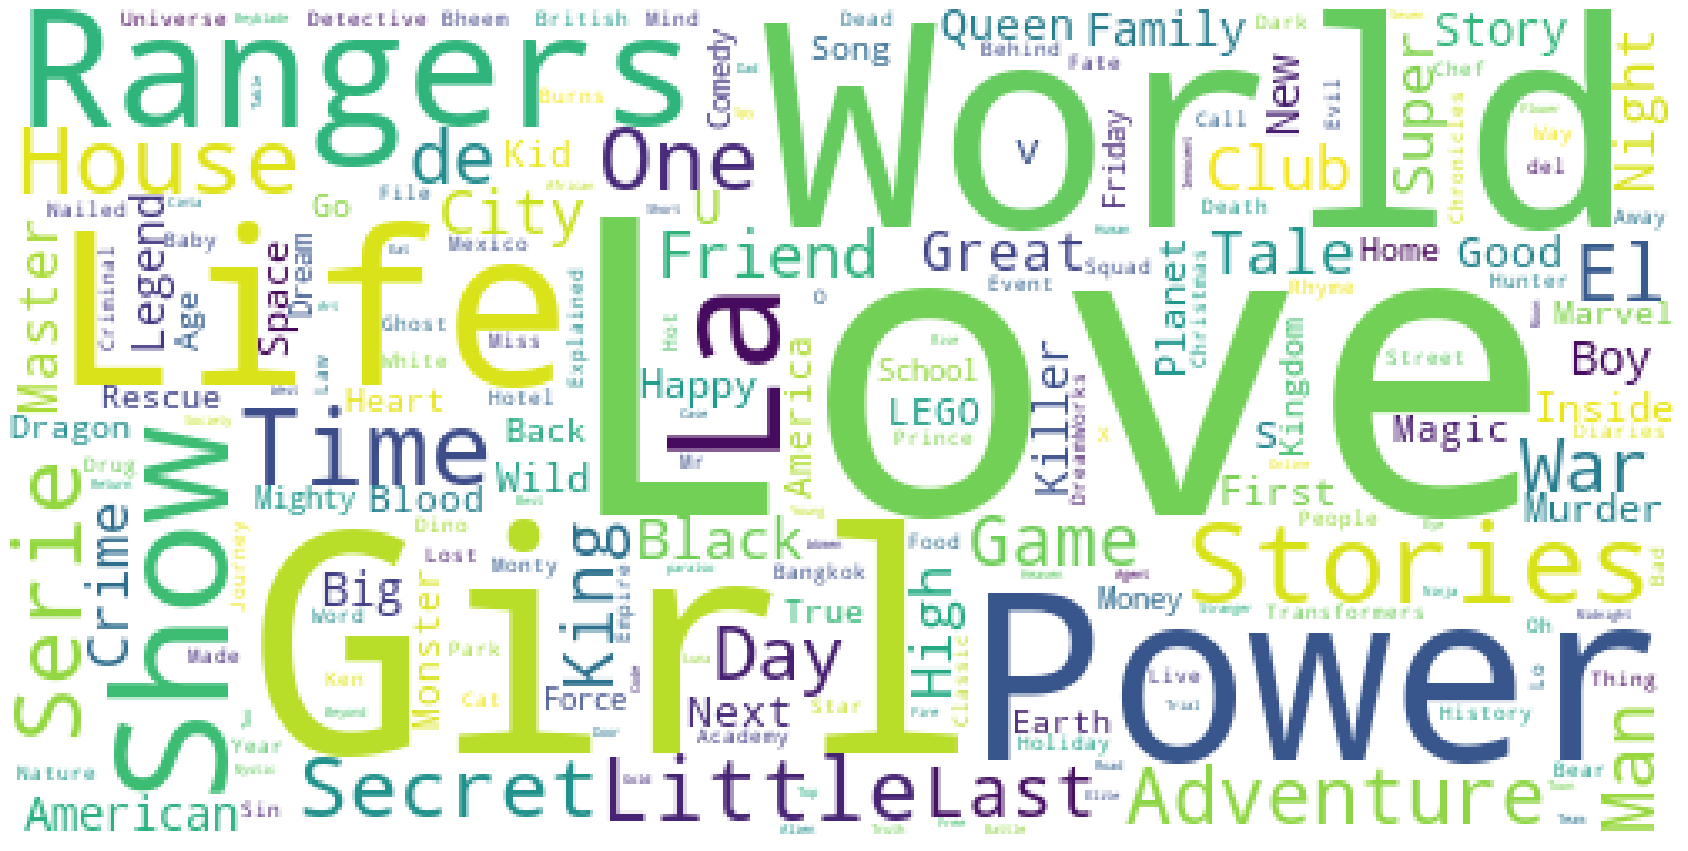

In [ ]:
# title analysis of Netflix series

stop_words = set(stopwords.words('english'))
netflix_series['title_no_stopwords'] = netflix_series['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in netflix_series['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 500, height = 250, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

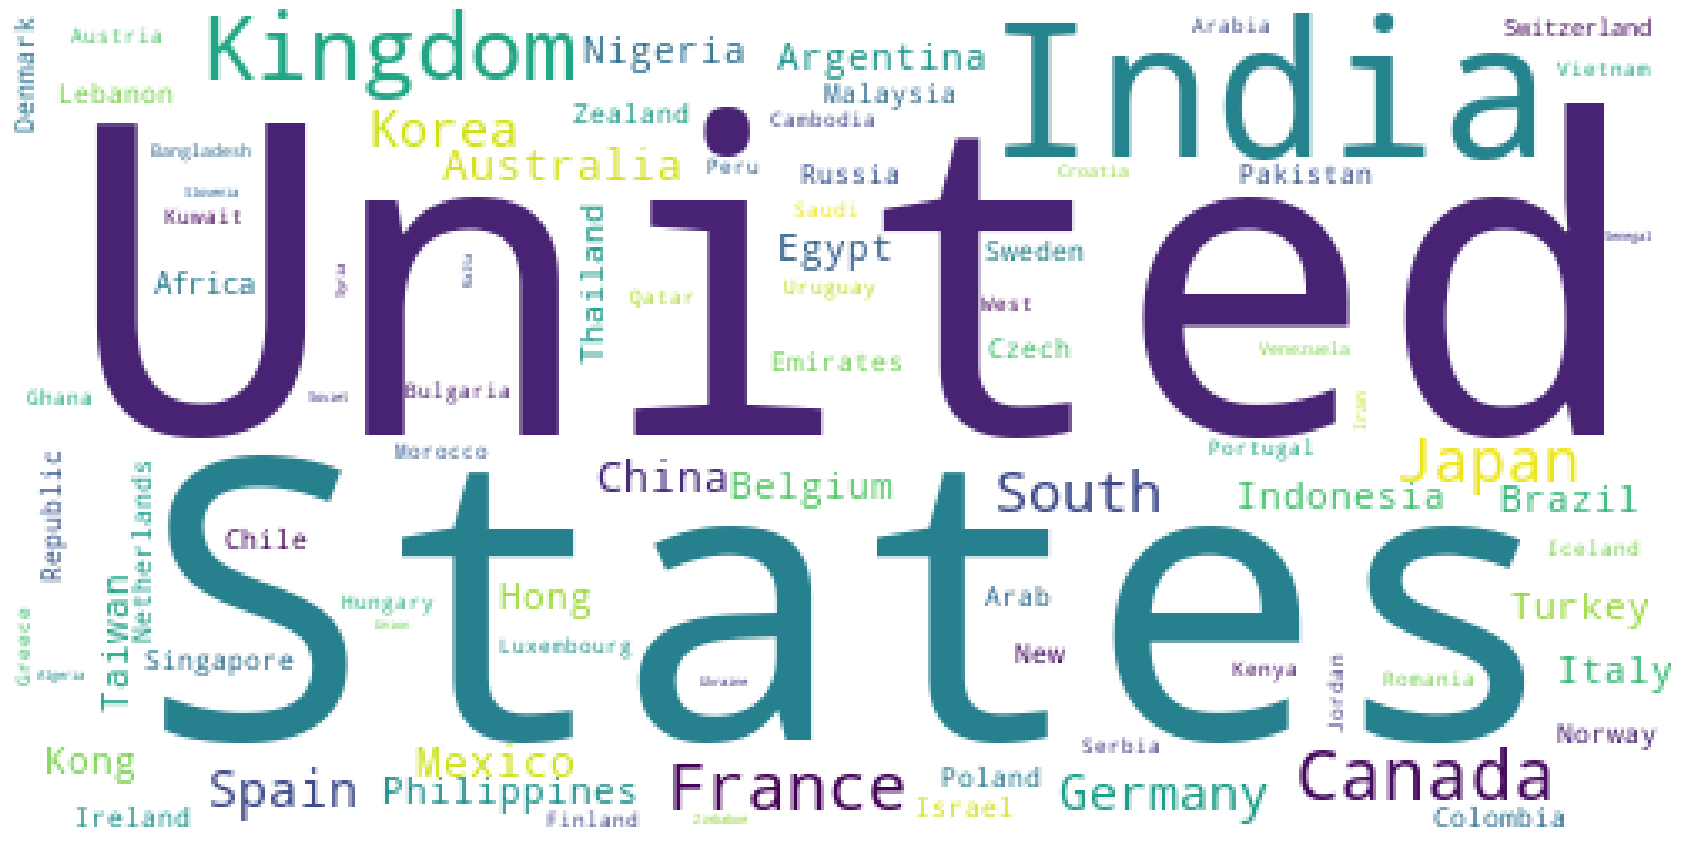

In [ ]:
# Country analysis of Netflix videos

stop_words = set(stopwords.words('english'))
data['title_no_stopwords'] = data['country'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in data['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 500, height = 250, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

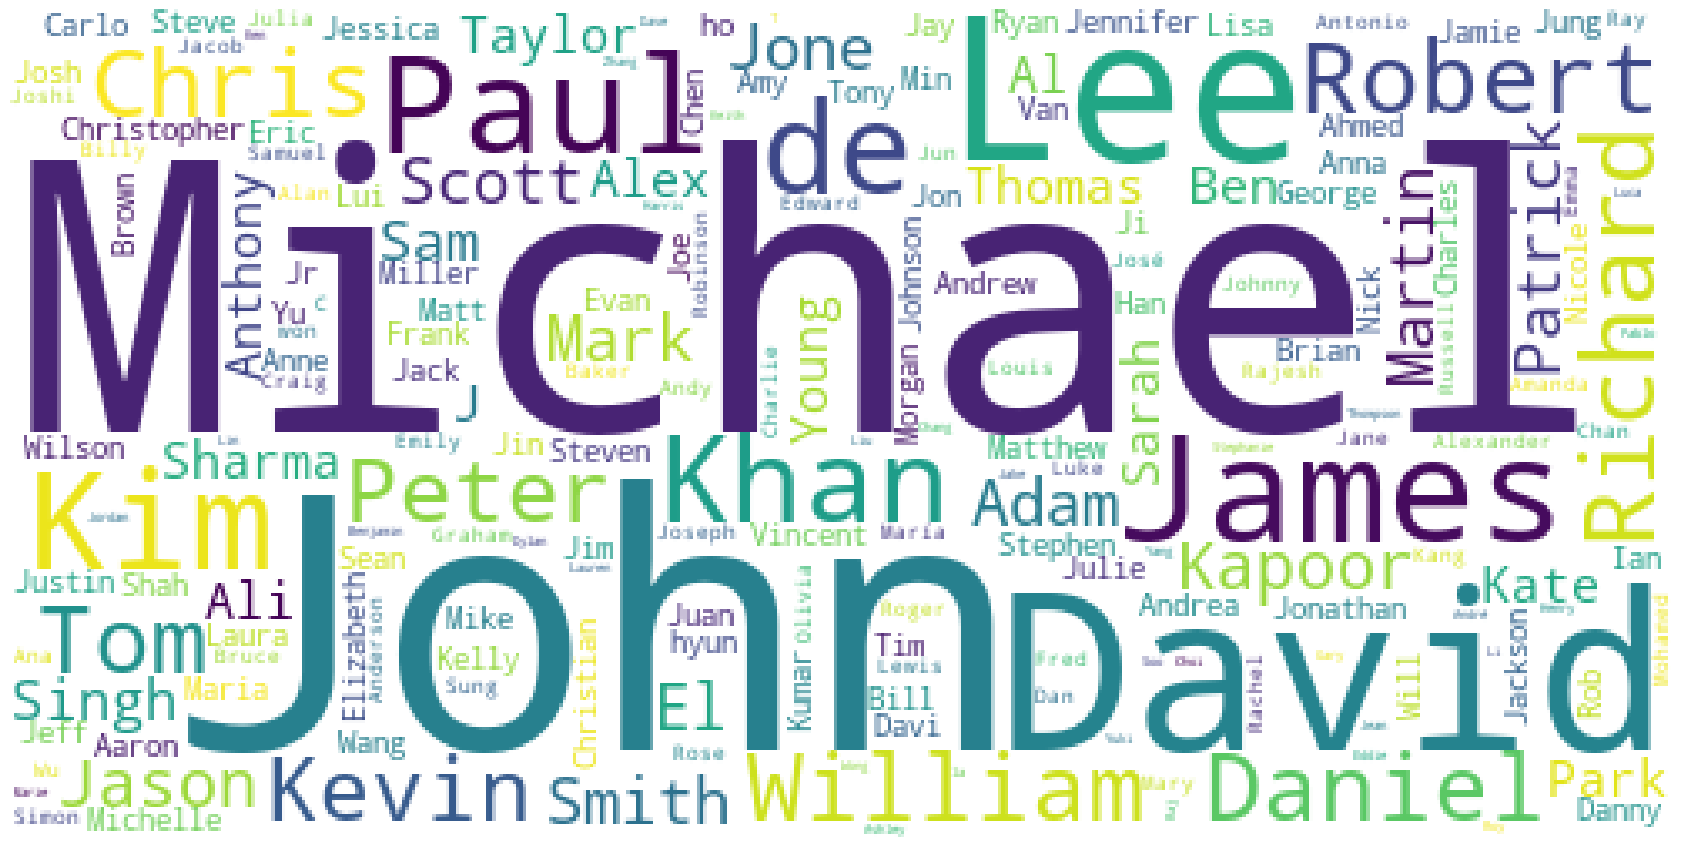

In [ ]:
# Cast analysis of Netflix videos

stop_words = set(stopwords.words('english'))
data['title_no_stopwords'] = data['cast'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in data['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 500, height = 250, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

##### ... till we meet again, do contact me on: 
##### Twitter: @SheriffHolla
##### Gmail: s.adeoti86@gmail.com
##### LinkedIn: Adeoti Sheriffdeen 